In [1]:
import random 
import pandas as pd
import numpy as np
import csv
from pandasql import sqldf
import statistics as stat
from statistics import mean
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
from scipy.stats import chi2

In [2]:
# Import Buxton_Challenge_Data.csv for a year's worth of 2016 predictive sales data 
file1 = 'Buxton_Challenge_Data.csv'
BuxtonFile = pd.read_csv(file1, sep = ',')

# Create a DataFrame
dfBuxtonData = sqldf('''SELECT * FROM BuxtonFile where SQFT <= 23000;''')
dfBuxtonData.head(70)

,SID,OPEN_YEAR,DENSITY_CLASS,DENSITY_CLASS_2,DENSITY_CLASS_3,REGION,REGION_SA,REGION_MA,REGION_ENC,STATE,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
0,21266493,NaN,2,1,0,SA,1,0,0,WV,...,96.14,93.11,94.20,94.70,92.13,92.71,2767007.12,723.39,2259801.14,460.22
1,21266530,1992.0,3,0,1,SA,1,0,0,MD,...,66.73,69.77,77.59,58.46,61.75,72.12,6290932.87,528.81,10021297.72,420.55
2,21266533,1994.0,4,0,0,SA,1,0,0,MD,...,44.14,46.37,55.57,39.67,40.99,49.77,7250145.91,313.20,16228032.28,459.14
3,21266535,1994.0,4,0,0,SA,1,0,0,MD,...,75.63,48.81,28.03,70.81,48.22,27.65,8282648.63,375.73,13865147.64,487.46
4,21266546,1996.0,4,0,0,SA,1,0,0,VA,...,70.32,68.87,61.56,63.92,61.62,54.52,6316723.52,377.23,7455916.64,482.23
5,21266554,1997.0,2,1,0,SA,1,0,0,DE,...,71.63,67.77,68.32,68.13,64.37,65.41,7208278.46,605.26,4896570.20,441.10
6,21266556,1997.0,3,0,1,SA,1,0,0,NC,...,55.24,54.12,54.94,50.44,50.24,49.90,9330586.63,480.84,19788171.56,494.30
7,21266558,1997.0,3,0,1,SA,1,0,0,NC,...,85.67,81.67,86.98,81.19,77.99,83.77,6834876.13,536.77,11081208.13,420.72
8,21266563,1998.0,2,1,0,SA,1,0,0,NC,...,85.81,85.09,73.48,82.74,81.53,68.38,6924028.09,625.58,7036508.25,469.30
9,21266565,1998.0,3,0,1,SA,1,0,0,NC,...,49.78,51.31,47.58,46.43,47.05,44.11,9599469.77,623.21,9895135.57,526.77


                 SALES_2016  AMENBOYS_0_5RO  AMENBOYS_1RO  AMENBOYS_8TO  \
SALES_2016         1.000000        0.342575      0.425865      0.496419   
AMENBOYS_0_5RO     0.342575        1.000000      0.946700      0.856802   
AMENBOYS_1RO       0.425865        0.946700      1.000000      0.943562   
AMENBOYS_8TO       0.496419        0.856802      0.943562      1.000000   
AMENBOYS_16TO      0.506734        0.756595      0.862359      0.953432   
AWMNSGRLS_0_5RO    0.383484        0.727018      0.666894      0.557339   
AWMNSGRLS_1RO      0.466987        0.750685      0.736967      0.666668   
AWMNSGRLS_8TO      0.656939        0.721497      0.727248      0.772947   
AWMNSGRLS_16TO     0.630909        0.637029      0.646212      0.690237   

                 AMENBOYS_16TO  AWMNSGRLS_0_5RO  AWMNSGRLS_1RO  AWMNSGRLS_8TO  \
SALES_2016            0.506734         0.383484       0.466987       0.656939   
AMENBOYS_0_5RO        0.756595         0.727018       0.750685       0.721497   
AMENBO

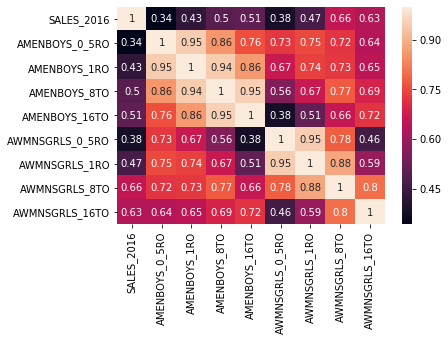

In [3]:
# Create a DataFrame for apparel expenditures for men and women
dfApparelExp = sqldf('''SELECT SALES_2016
,AMENBOYS_0_5RO
,AMENBOYS_1RO
,AMENBOYS_8TO
,AMENBOYS_16TO
,AWMNSGRLS_0_5RO
,AWMNSGRLS_1RO
,AWMNSGRLS_8TO
,AWMNSGRLS_16TO
FROM dfBuxtonData;''')
dfApparelExp.head(20)

# Create correlation matrix for apparel expenditures for men and women
corrMatrix = dfApparelExp.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

              SALES_2016  AXFOOT_0_5RO  AXFOOT_1RO  AXFOOT_8TO  AXFOOT_16TO
SALES_2016      1.000000      0.303763    0.419114    0.506544     0.496564
AXFOOT_0_5RO    0.303763      1.000000    0.963660    0.896289     0.771453
AXFOOT_1RO      0.419114      0.963660    1.000000    0.964255     0.862938
AXFOOT_8TO      0.506544      0.896289    0.964255    1.000000     0.927326
AXFOOT_16TO     0.496564      0.771453    0.862938    0.927326     1.000000


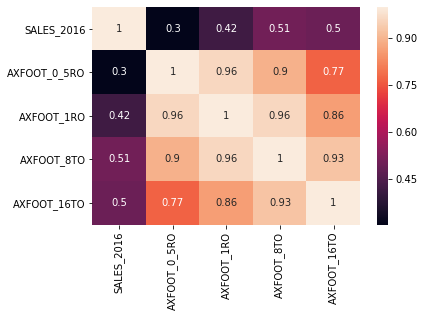

In [4]:
# Create a DataFrame for sql query below
dfAxFoot = sqldf('''SELECT SALES_2016
,AXFOOT_0_5RO
,AXFOOT_1RO
,AXFOOT_8TO
,AXFOOT_16TO
FROM dfBuxtonData;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfAxFoot.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                   SALES_2016  CMDSC_COMP_A_1RO  CMDSC_COMP_B_1RO  \
SALES_2016           1.000000          0.642969          0.128279   
CMDSC_COMP_A_1RO     0.642969          1.000000          0.201449   
CMDSC_COMP_B_1RO     0.128279          0.201449          1.000000   
CMDSC_COMP_C_1RO     0.164104          0.382355         -0.004371   
CMDSC_COMP_D_1RO    -0.259714         -0.132029          0.451049   
CMDSC_COMP_E_1RO     0.003822         -0.047619          0.128127   
CMDSC_GROCERY_1RO   -0.250817         -0.063865          0.013415   
CMDSC_PCBB_1RO      -0.188565         -0.021471          0.513750   

                   CMDSC_COMP_C_1RO  CMDSC_COMP_D_1RO  CMDSC_COMP_E_1RO  \
SALES_2016                 0.164104         -0.259714          0.003822   
CMDSC_COMP_A_1RO           0.382355         -0.132029         -0.047619   
CMDSC_COMP_B_1RO          -0.004371          0.451049          0.128127   
CMDSC_COMP_C_1RO           1.000000          0.071527          0.013327   
CMD

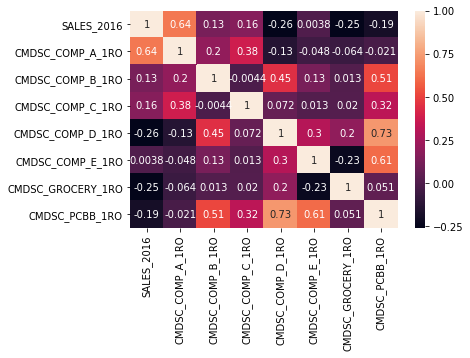

In [5]:
# Create a DataFrame for distance Score (Closer Proximity and Greater Count = Higher Value)
dfComp1RO = sqldf('''SELECT SALES_2016
,CMDSC_COMP_A_1RO
,CMDSC_COMP_B_1RO
,CMDSC_COMP_C_1RO
,CMDSC_COMP_D_1RO
,CMDSC_COMP_E_1RO
,CMDSC_GROCERY_1RO
,CMDSC_PCBB_1RO
FROM dfBuxtonData;''')
dfApparelExp.head(20)

# Create correlation matrix for distance Score (Closer Proximity and Greater Count = Higher Value)
corrMatrix = dfComp1RO.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                SALES_2016  CM_COMP_A_16TO  CM_COMP_B_16TO  CM_COMP_C_16TO  \
SALES_2016        1.000000        0.000627        0.390718        0.397290   
CM_COMP_A_16TO    0.000627        1.000000        0.529617        0.362765   
CM_COMP_B_16TO    0.390718        0.529617        1.000000        0.881862   
CM_COMP_C_16TO    0.397290        0.362765        0.881862        1.000000   
CM_COMP_D_16TO    0.219581        0.504741        0.633468        0.676117   
CM_COMP_E_16TO   -0.239730       -0.063296        0.144557        0.189525   

                CM_COMP_D_16TO  CM_COMP_E_16TO  
SALES_2016            0.219581       -0.239730  
CM_COMP_A_16TO        0.504741       -0.063296  
CM_COMP_B_16TO        0.633468        0.144557  
CM_COMP_C_16TO        0.676117        0.189525  
CM_COMP_D_16TO        1.000000        0.008744  
CM_COMP_E_16TO        0.008744        1.000000  


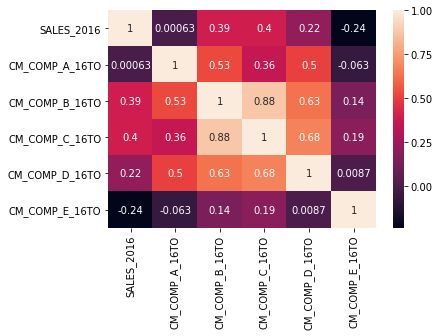

In [6]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CM_COMP_A_16TO
,CM_COMP_B_16TO
,CM_COMP_C_16TO
,CM_COMP_D_16TO
,CM_COMP_E_16TO
FROM dfBuxtonData;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                      SALES_2016  CM_GROCERY_0_5RO  CM_PCBB_0_5RO  \
SALES_2016              1.000000         -0.268292      -0.285929   
CM_GROCERY_0_5RO       -0.268292          1.000000       0.027114   
CM_PCBB_0_5RO          -0.285929          0.027114       1.000000   
CNT_MALLS_0_5RO        -0.176065          0.333885       0.636002   
CNT_MALLS_100K_0_5RO   -0.292701          0.355484       0.762381   
CNT_MALLS_300K_0_5RO   -0.326422         -0.049392       0.617695   
COMMUTE_AVG_16TO        0.534709         -0.319492      -0.412284   

                      CNT_MALLS_0_5RO  CNT_MALLS_100K_0_5RO  \
SALES_2016                  -0.176065             -0.292701   
CM_GROCERY_0_5RO             0.333885              0.355484   
CM_PCBB_0_5RO                0.636002              0.762381   
CNT_MALLS_0_5RO              1.000000              0.892436   
CNT_MALLS_100K_0_5RO         0.892436              1.000000   
CNT_MALLS_300K_0_5RO         0.487858              0.629733   
COMMUT

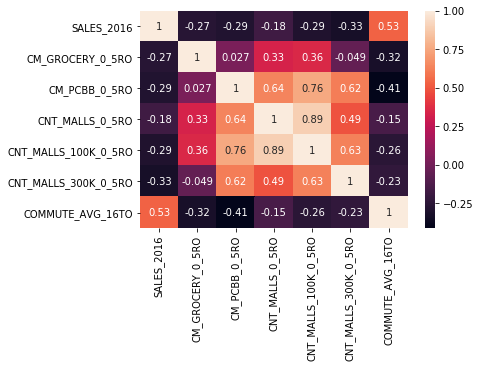

In [7]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CM_GROCERY_0_5RO
,CM_PCBB_0_5RO
,CNT_MALLS_0_5RO
,CNT_MALLS_100K_0_5RO
,CNT_MALLS_300K_0_5RO
,COMMUTE_AVG_16TO
FROM dfBuxtonData;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                SALES_2016  CX01V142_0_5RO  CX01V142_1RO  CX01V142_8TO  \
SALES_2016        1.000000        0.746792      0.708063      0.313965   
CX01V142_0_5RO    0.746792        1.000000      0.899513      0.594703   
CX01V142_1RO      0.708063        0.899513      1.000000      0.707549   
CX01V142_8TO      0.313965        0.594703      0.707549      1.000000   
CX01V142_16TO     0.642471        0.762819      0.780703      0.812523   

                CX01V142_16TO  
SALES_2016           0.642471  
CX01V142_0_5RO       0.762819  
CX01V142_1RO         0.780703  
CX01V142_8TO         0.812523  
CX01V142_16TO        1.000000  


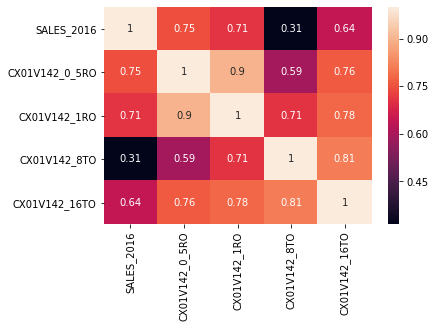

In [8]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CX01V142_0_5RO
,CX01V142_1RO
,CX01V142_8TO
,CX01V142_16TO
FROM dfBuxtonData;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                SALES_2016  CX01V143_0_5RO  CX01V143_1RO  CX01V143_8TO  \
SALES_2016        1.000000        0.761651      0.732823      0.425225   
CX01V143_0_5RO    0.761651        1.000000      0.860661      0.590220   
CX01V143_1RO      0.732823        0.860661      1.000000      0.746706   
CX01V143_8TO      0.425225        0.590220      0.746706      1.000000   
CX01V143_16TO     0.689440        0.773535      0.821317      0.839031   

                CX01V143_16TO  
SALES_2016           0.689440  
CX01V143_0_5RO       0.773535  
CX01V143_1RO         0.821317  
CX01V143_8TO         0.839031  
CX01V143_16TO        1.000000  


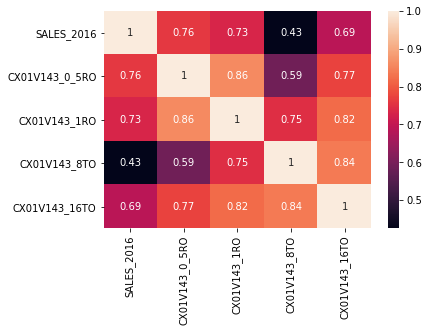

In [9]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CX01V143_0_5RO
,CX01V143_1RO
,CX01V143_8TO
,CX01V143_16TO
FROM dfBuxtonData;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                SALES_2016  CX02V051_0_5RO  CX02V051_1RO  CX02V051_8TO  \
SALES_2016        1.000000        0.503328      0.462691      0.088152   
CX02V051_0_5RO    0.503328        1.000000      0.781007      0.501008   
CX02V051_1RO      0.462691        0.781007      1.000000      0.693483   
CX02V051_8TO      0.088152        0.501008      0.693483      1.000000   
CX02V051_16TO     0.502435        0.718703      0.706240      0.793249   

                CX02V051_16TO  
SALES_2016           0.502435  
CX02V051_0_5RO       0.718703  
CX02V051_1RO         0.706240  
CX02V051_8TO         0.793249  
CX02V051_16TO        1.000000  


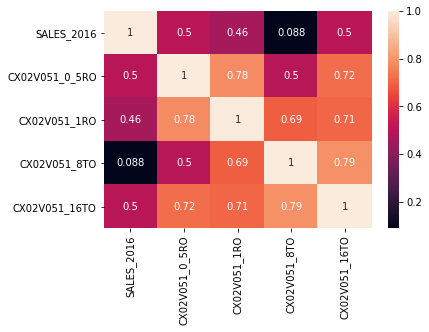

In [10]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CX02V051_0_5RO
,CX02V051_1RO
,CX02V051_8TO
,CX02V051_16TO
FROM dfBuxtonData;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

                 SALES_2016  DIST_HWY  DIST_INTERSTATE
SALES_2016         1.000000  0.356637        -0.036681
DIST_HWY           0.356637  1.000000        -0.355784
DIST_INTERSTATE   -0.036681 -0.355784         1.000000


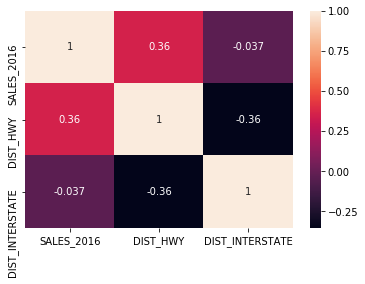

In [11]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016,DIST_HWY, DIST_INTERSTATE
FROM dfBuxtonData;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

              SALES_2016  EXP_AVG_1RO  EXP_AVG_8TO  EXP_AVG_16TO  EXP_TOT_1RO  \
SALES_2016      1.000000     0.527699     0.642248      0.587922     0.675251   
EXP_AVG_1RO     0.527699     1.000000     0.938920      0.778406     0.484078   
EXP_AVG_8TO     0.642248     0.938920     1.000000      0.880493     0.638779   
EXP_AVG_16TO    0.587922     0.778406     0.880493      1.000000     0.760181   
EXP_TOT_1RO     0.675251     0.484078     0.638779      0.760181     1.000000   
EXP_TOT_8TO     0.331796     0.514456     0.596092      0.689679     0.754272   
EXP_TOT_16TO    0.645926     0.537117     0.658727      0.646640     0.790408   
FPOP_1RO        0.603466     0.302584     0.516980      0.659548     0.904540   
FPOP_8TO        0.158542     0.223052     0.315557      0.440326     0.597363   
FPOP_16TO       0.450476     0.336703     0.446732      0.421703     0.612336   

              EXP_TOT_8TO  EXP_TOT_16TO  FPOP_1RO  FPOP_8TO  FPOP_16TO  
SALES_2016       0.331796      0.64

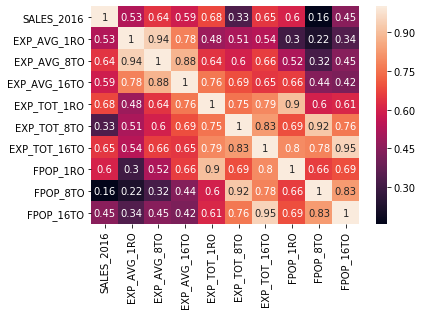

In [12]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,EXP_AVG_1RO
,EXP_AVG_8TO
,EXP_AVG_16TO
,EXP_TOT_1RO
,EXP_TOT_8TO
,EXP_TOT_16TO
,FPOP_1RO
,FPOP_8TO
,FPOP_16TO
FROM dfBuxtonData;''')
dfApparelExp.head(20)

# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot=True)

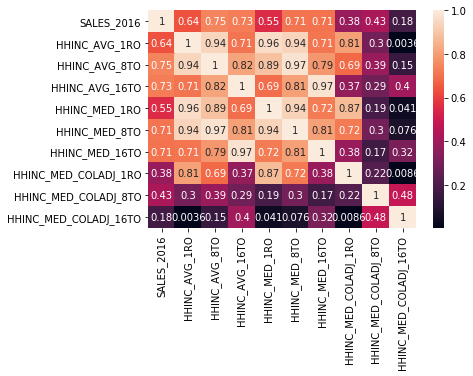

In [13]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HHINC_AVG_1RO
,HHINC_AVG_8TO
,HHINC_AVG_16TO
,HHINC_MED_1RO
,HHINC_MED_8TO
,HHINC_MED_16TO
,HHINC_MED_COLADJ_1RO
,HHINC_MED_COLADJ_8TO
,HHINC_MED_COLADJ_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

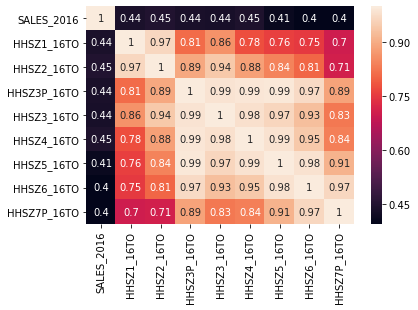

In [14]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HHSZ1_16TO
,HHSZ2_16TO
,HHSZ3P_16TO
,HHSZ3_16TO
,HHSZ4_16TO
,HHSZ5_16TO
,HHSZ6_16TO
,HHSZ7P_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

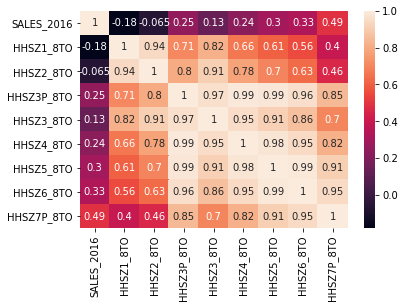

In [15]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HHSZ1_8TO
,HHSZ2_8TO
,HHSZ3P_8TO
,HHSZ3_8TO
,HHSZ4_8TO
,HHSZ5_8TO
,HHSZ6_8TO
,HHSZ7P_8TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

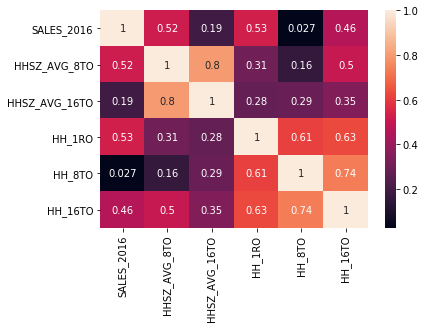

In [16]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HHSZ_AVG_8TO
,HHSZ_AVG_16TO
,HH_1RO
,HH_8TO
,HH_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

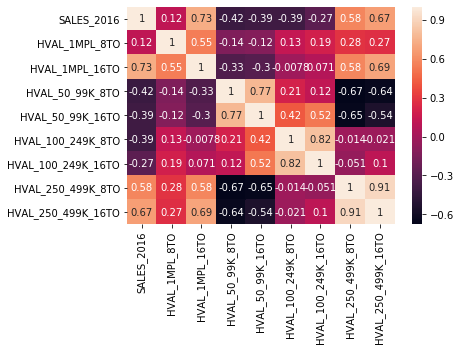

In [17]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HVAL_1MPL_8TO
,HVAL_1MPL_16TO
,HVAL_50_99K_8TO
,HVAL_50_99K_16TO
,HVAL_100_249K_8TO
,HVAL_100_249K_16TO
,HVAL_250_499K_8TO
,HVAL_250_499K_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

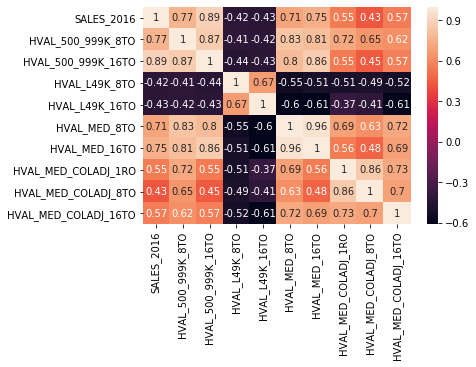

In [18]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,HVAL_500_999K_8TO
,HVAL_500_999K_16TO
,HVAL_L49K_8TO
,HVAL_L49K_16TO
,HVAL_MED_8TO
,HVAL_MED_16TO
,HVAL_MED_COLADJ_1RO
,HVAL_MED_COLADJ_8TO
,HVAL_MED_COLADJ_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

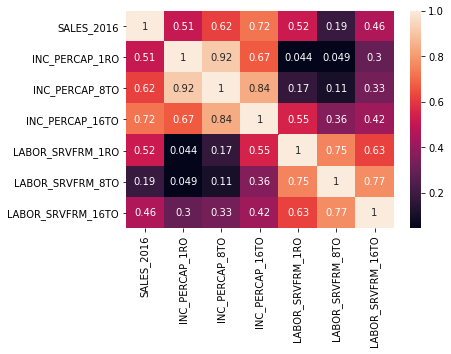

In [19]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,INC_PERCAP_1RO
,INC_PERCAP_8TO
,INC_PERCAP_16TO
,LABOR_SRVFRM_1RO
,LABOR_SRVFRM_8TO
,LABOR_SRVFRM_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

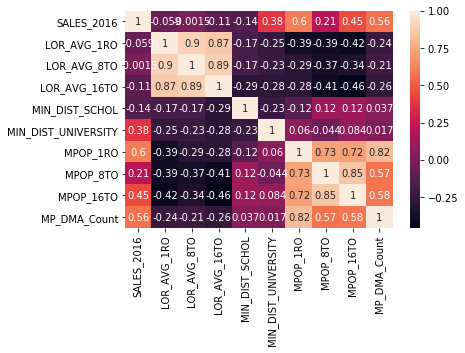

In [20]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,LOR_AVG_1RO
,LOR_AVG_8TO
,LOR_AVG_16TO
,MIN_DIST_SCHOL
,MIN_DIST_UNIVERSITY
,MPOP_1RO
,MPOP_8TO
,MPOP_16TO
,MP_DMA_Count
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

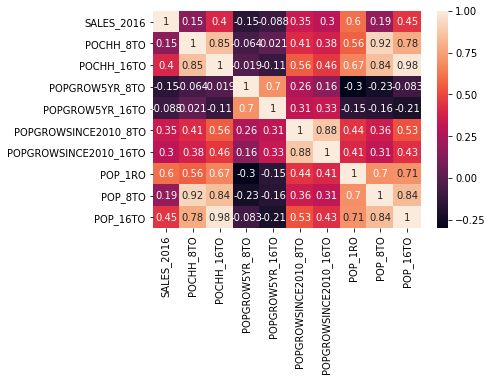

In [21]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,POCHH_8TO
,POCHH_16TO
,POPGROW5YR_8TO
,POPGROW5YR_16TO
,POPGROWSINCE2010_8TO
,POPGROWSINCE2010_16TO
,POP_1RO
,POP_8TO
,POP_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

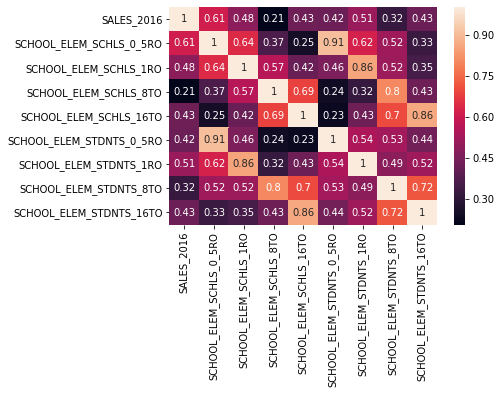

In [22]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,SCHOOL_ELEM_SCHLS_0_5RO
,SCHOOL_ELEM_SCHLS_1RO
,SCHOOL_ELEM_SCHLS_8TO
,SCHOOL_ELEM_SCHLS_16TO
,SCHOOL_ELEM_STDNTS_0_5RO
,SCHOOL_ELEM_STDNTS_1RO
,SCHOOL_ELEM_STDNTS_8TO
,SCHOOL_ELEM_STDNTS_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

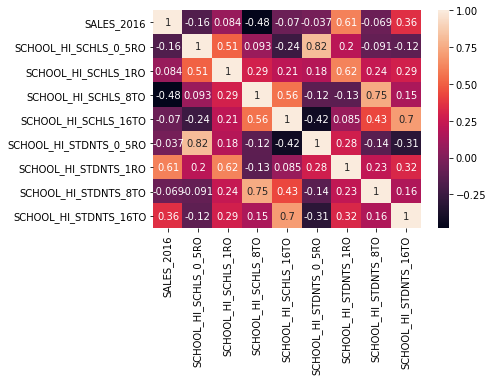

In [23]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,SCHOOL_HI_SCHLS_0_5RO
,SCHOOL_HI_SCHLS_1RO
,SCHOOL_HI_SCHLS_8TO
,SCHOOL_HI_SCHLS_16TO
,SCHOOL_HI_STDNTS_0_5RO
,SCHOOL_HI_STDNTS_1RO
,SCHOOL_HI_STDNTS_8TO
,SCHOOL_HI_STDNTS_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

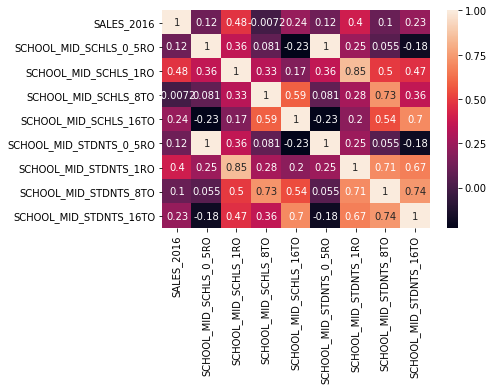

In [24]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,SCHOOL_MID_SCHLS_0_5RO
,SCHOOL_MID_SCHLS_1RO
,SCHOOL_MID_SCHLS_8TO
,SCHOOL_MID_SCHLS_16TO
,SCHOOL_MID_STDNTS_0_5RO
,SCHOOL_MID_STDNTS_1RO
,SCHOOL_MID_STDNTS_8TO
,SCHOOL_MID_STDNTS_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

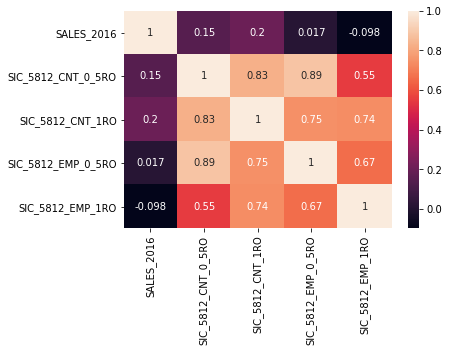

In [25]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,SIC_5812_CNT_0_5RO
,SIC_5812_CNT_1RO
,SIC_5812_EMP_0_5RO
,SIC_5812_EMP_1RO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

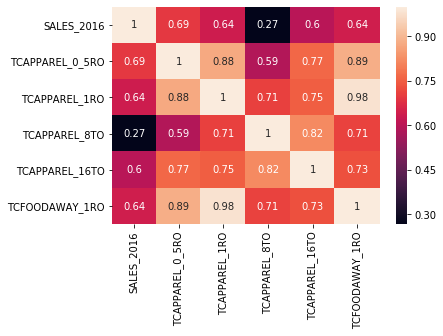

In [26]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,TCAPPAREL_0_5RO
,TCAPPAREL_1RO
,TCAPPAREL_8TO
,TCAPPAREL_16TO
,TCFOODAWAY_1RO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

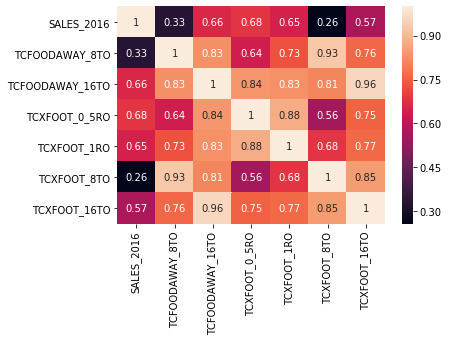

In [27]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,TCFOODAWAY_8TO
,TCFOODAWAY_16TO
,TCXFOOT_0_5RO
,TCXFOOT_1RO
,TCXFOOT_8TO
,TCXFOOT_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

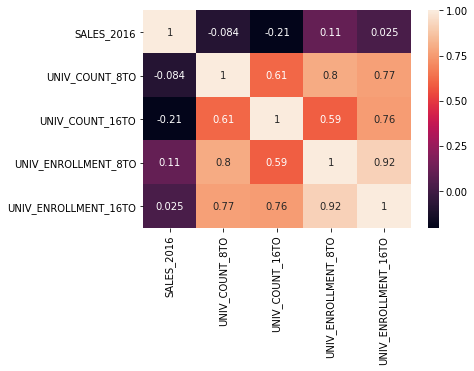

In [28]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,UNIV_COUNT_8TO
,UNIV_COUNT_16TO
,UNIV_ENROLLMENT_8TO
,UNIV_ENROLLMENT_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

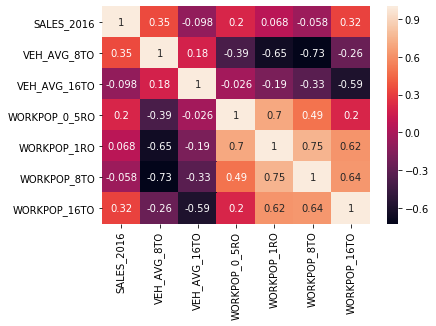

In [29]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,VEH_AVG_8TO
,VEH_AVG_16TO
,WORKPOP_0_5RO
,WORKPOP_1RO
,WORKPOP_8TO
,WORKPOP_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

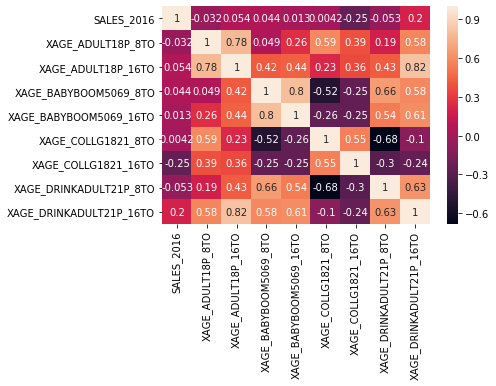

In [30]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_ADULT18P_8TO
,XAGE_ADULT18P_16TO
,XAGE_BABYBOOM5069_8TO
,XAGE_BABYBOOM5069_16TO
,XAGE_COLLG1821_8TO
,XAGE_COLLG1821_16TO
,XAGE_DRINKADULT21P_8TO
,XAGE_DRINKADULT21P_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

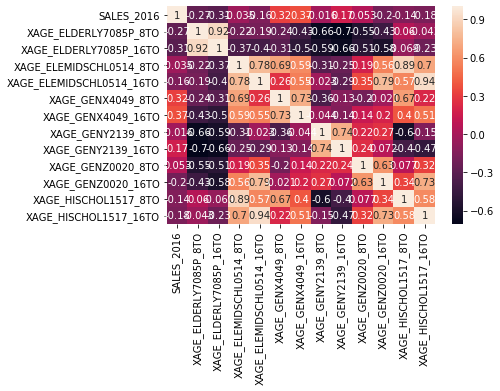

In [31]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_ELDERLY7085P_8TO
,XAGE_ELDERLY7085P_16TO
,XAGE_ELEMIDSCHL0514_8TO
,XAGE_ELEMIDSCHL0514_16TO
,XAGE_GENX4049_8TO
,XAGE_GENX4049_16TO
,XAGE_GENY2139_8TO
,XAGE_GENY2139_16TO
,XAGE_GENZ0020_8TO
,XAGE_GENZ0020_16TO
,XAGE_HISCHOL1517_8TO
,XAGE_HISCHOL1517_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

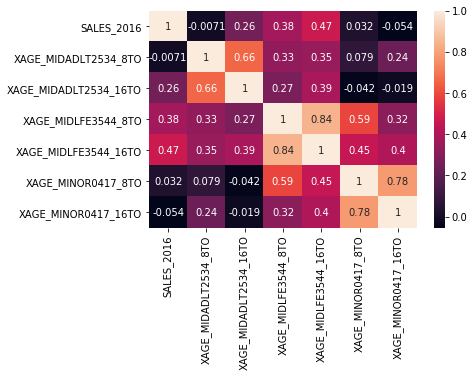

In [32]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_MIDADLT2534_8TO
,XAGE_MIDADLT2534_16TO
,XAGE_MIDLFE3544_8TO
,XAGE_MIDLFE3544_16TO
,XAGE_MINOR0417_8TO
,XAGE_MINOR0417_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

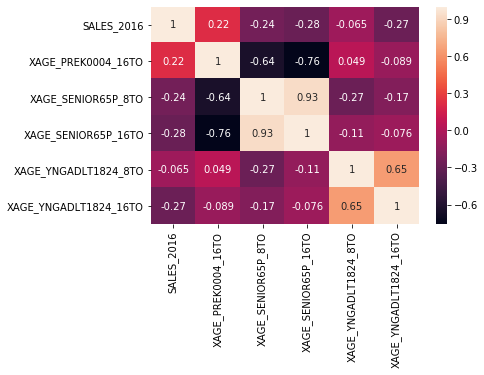

In [33]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_PREK0004_16TO
,XAGE_SENIOR65P_8TO
,XAGE_SENIOR65P_16TO
,XAGE_YNGADLT1824_8TO
,XAGE_YNGADLT1824_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

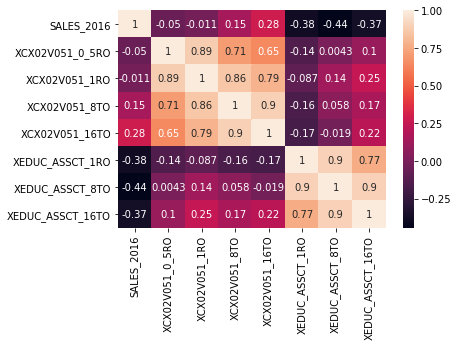

In [34]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XCX02V051_0_5RO
,XCX02V051_1RO
,XCX02V051_8TO
,XCX02V051_16TO
,XEDUC_ASSCT_1RO
,XEDUC_ASSCT_8TO
,XEDUC_ASSCT_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

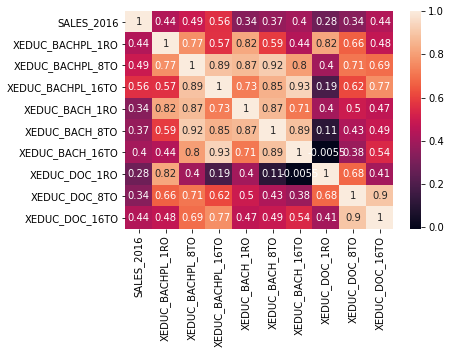

In [35]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XEDUC_BACHPL_1RO
,XEDUC_BACHPL_8TO
,XEDUC_BACHPL_16TO
,XEDUC_BACH_1RO
,XEDUC_BACH_8TO
,XEDUC_BACH_16TO
,XEDUC_DOC_1RO
,XEDUC_DOC_8TO
,XEDUC_DOC_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

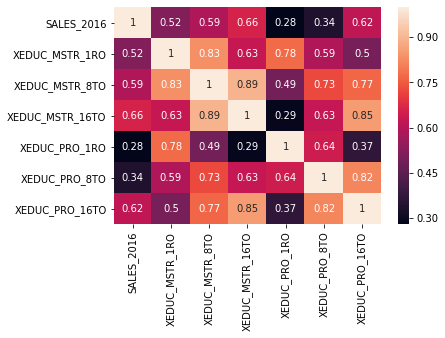

In [36]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XEDUC_MSTR_1RO
,XEDUC_MSTR_8TO
,XEDUC_MSTR_16TO
,XEDUC_PRO_1RO
,XEDUC_PRO_8TO
,XEDUC_PRO_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

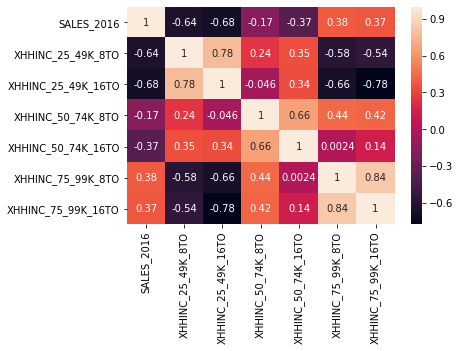

In [37]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHHINC_25_49K_8TO
,XHHINC_25_49K_16TO
,XHHINC_50_74K_8TO
,XHHINC_50_74K_16TO
,XHHINC_75_99K_8TO
,XHHINC_75_99K_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

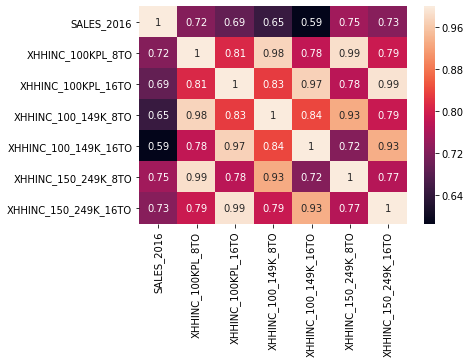

In [38]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHHINC_100KPL_8TO
,XHHINC_100KPL_16TO
,XHHINC_100_149K_8TO
,XHHINC_100_149K_16TO
,XHHINC_150_249K_8TO
,XHHINC_150_249K_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

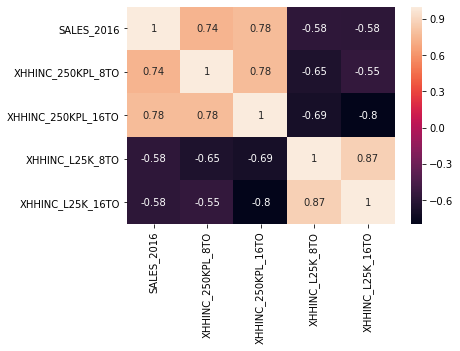

In [39]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHHINC_250KPL_8TO
,XHHINC_250KPL_16TO
,XHHINC_L25K_8TO
,XHHINC_L25K_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

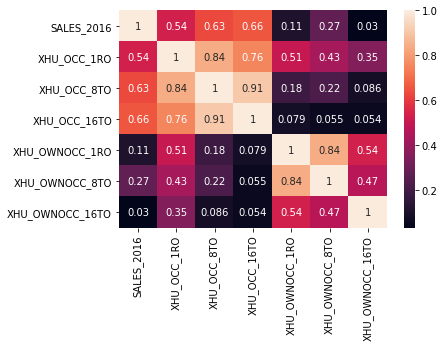

In [40]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHU_OCC_1RO
,XHU_OCC_8TO
,XHU_OCC_16TO
,XHU_OWNOCC_1RO
,XHU_OWNOCC_8TO
,XHU_OWNOCC_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

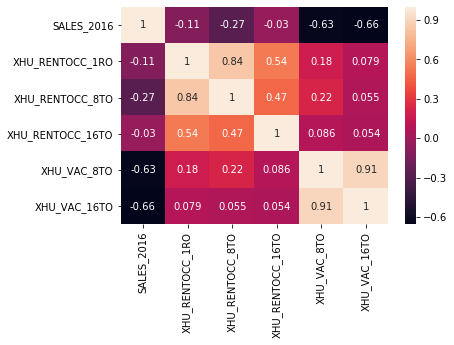

In [41]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHU_RENTOCC_1RO
,XHU_RENTOCC_8TO
,XHU_RENTOCC_16TO
,XHU_VAC_8TO
,XHU_VAC_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

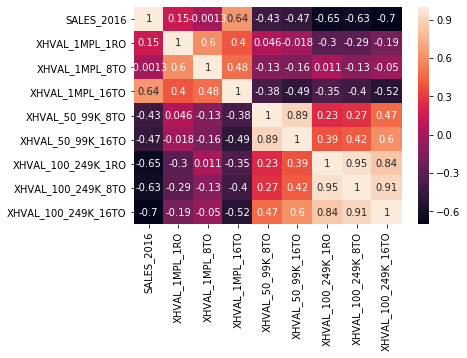

In [42]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHVAL_1MPL_1RO
,XHVAL_1MPL_8TO
,XHVAL_1MPL_16TO
,XHVAL_50_99K_8TO
,XHVAL_50_99K_16TO
,XHVAL_100_249K_1RO
,XHVAL_100_249K_8TO
,XHVAL_100_249K_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

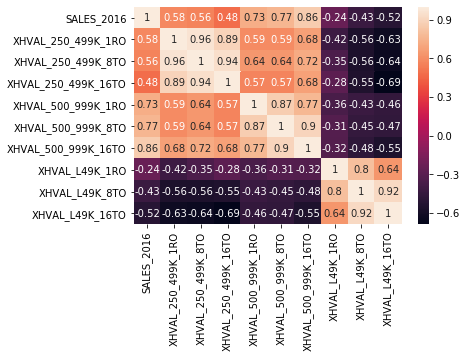

In [43]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHVAL_250_499K_1RO
,XHVAL_250_499K_8TO
,XHVAL_250_499K_16TO
,XHVAL_500_999K_1RO
,XHVAL_500_999K_8TO
,XHVAL_500_999K_16TO
,XHVAL_L49K_1RO
,XHVAL_L49K_8TO
,XHVAL_L49K_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

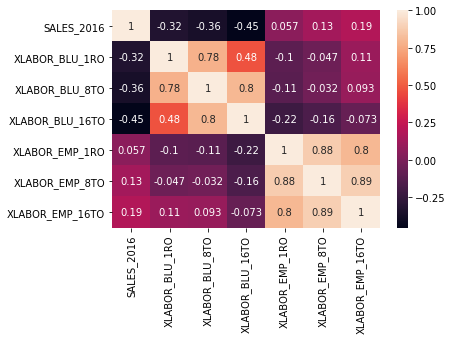

In [44]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XLABOR_BLU_1RO
,XLABOR_BLU_8TO
,XLABOR_BLU_16TO
,XLABOR_EMP_1RO
,XLABOR_EMP_8TO
,XLABOR_EMP_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

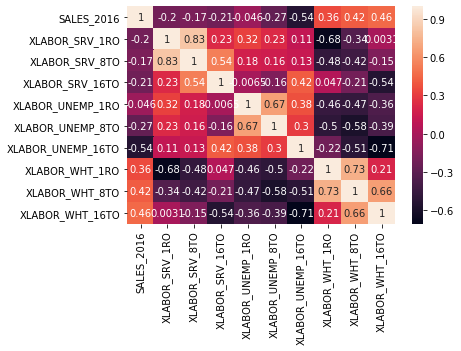

In [45]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XLABOR_SRV_1RO
,XLABOR_SRV_8TO
,XLABOR_SRV_16TO
,XLABOR_UNEMP_1RO
,XLABOR_UNEMP_8TO
,XLABOR_UNEMP_16TO
,XLABOR_WHT_1RO
,XLABOR_WHT_8TO
,XLABOR_WHT_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

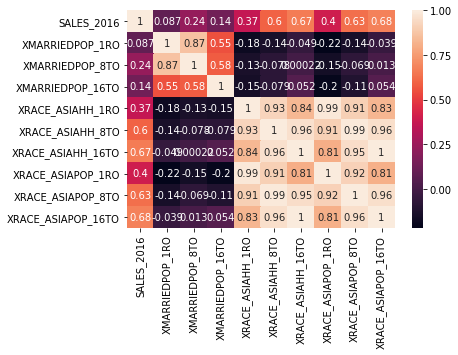

In [46]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XMARRIEDPOP_1RO
,XMARRIEDPOP_8TO
,XMARRIEDPOP_16TO
,XRACE_ASIAHH_1RO
,XRACE_ASIAHH_8TO
,XRACE_ASIAHH_16TO
,XRACE_ASIAPOP_1RO
,XRACE_ASIAPOP_8TO
,XRACE_ASIAPOP_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

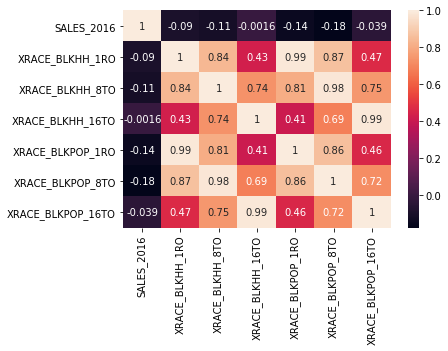

In [47]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XRACE_BLKHH_1RO
,XRACE_BLKHH_8TO
,XRACE_BLKHH_16TO
,XRACE_BLKPOP_1RO
,XRACE_BLKPOP_8TO
,XRACE_BLKPOP_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

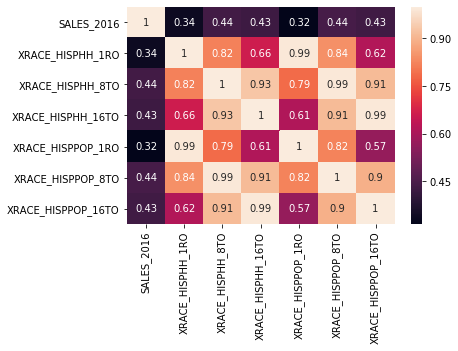

In [48]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XRACE_HISPHH_1RO
,XRACE_HISPHH_8TO
,XRACE_HISPHH_16TO
,XRACE_HISPPOP_1RO
,XRACE_HISPPOP_8TO
,XRACE_HISPPOP_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

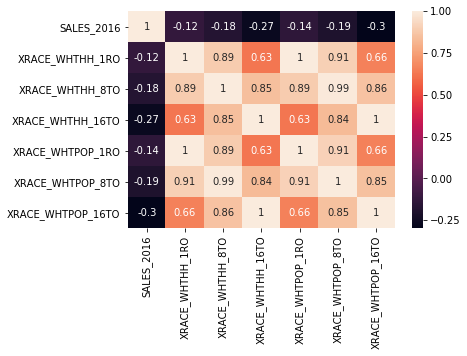

In [49]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XRACE_WHTHH_1RO
,XRACE_WHTHH_8TO
,XRACE_WHTHH_16TO
,XRACE_WHTPOP_1RO
,XRACE_WHTPOP_8TO
,XRACE_WHTPOP_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

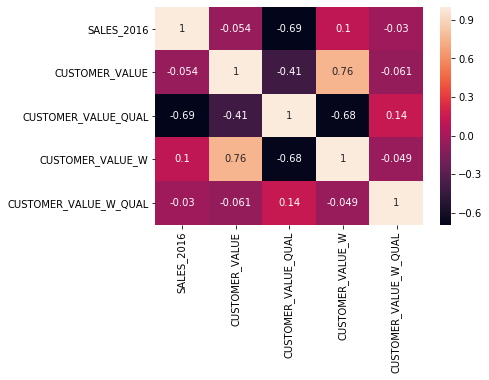

In [50]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CUSTOMER_VALUE
,CUSTOMER_VALUE_QUAL
,CUSTOMER_VALUE_W
,CUSTOMER_VALUE_W_QUAL
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

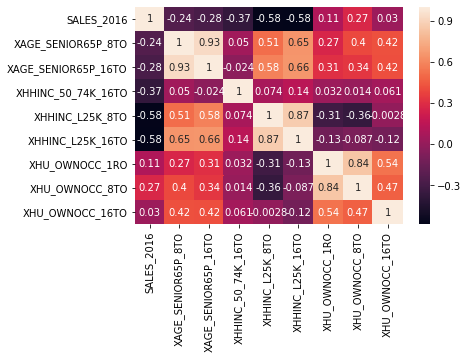

In [51]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_SENIOR65P_8TO 
,XAGE_SENIOR65P_16TO 
,XHHINC_50_74K_16TO 
,XHHINC_L25K_8TO 
,XHHINC_L25K_16TO 
,XHU_OWNOCC_1RO 
,XHU_OWNOCC_8TO 
,XHU_OWNOCC_16TO 
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

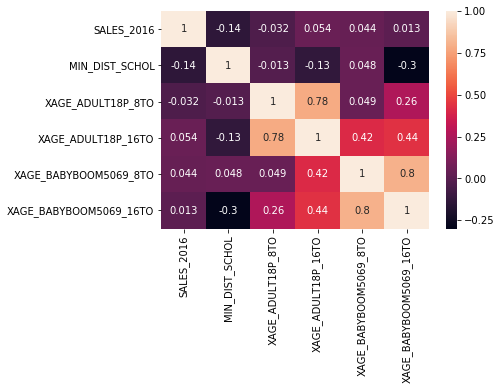

In [52]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,MIN_DIST_SCHOL 
,XAGE_ADULT18P_8TO 
,XAGE_ADULT18P_16TO 
,XAGE_BABYBOOM5069_8TO 
,XAGE_BABYBOOM5069_16TO 
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

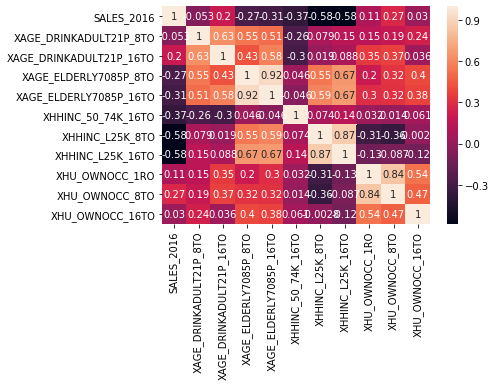

In [53]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XAGE_DRINKADULT21P_8TO 
,XAGE_DRINKADULT21P_16TO 
,XAGE_ELDERLY7085P_8TO 
,XAGE_ELDERLY7085P_16TO 
,XHHINC_50_74K_16TO 
,XHHINC_L25K_8TO 
,XHHINC_L25K_16TO 
,XHU_OWNOCC_1RO 
,XHU_OWNOCC_8TO 
,XHU_OWNOCC_16TO  
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

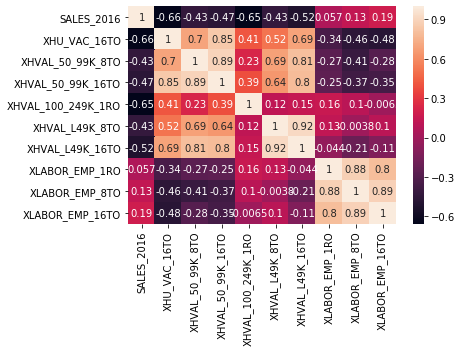

In [54]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XHU_VAC_16TO 
,XHVAL_50_99K_8TO 
,XHVAL_50_99K_16TO
,XHVAL_100_249K_1RO 
,XHVAL_L49K_8TO 
,XHVAL_L49K_16TO 
,XLABOR_EMP_1RO 
,XLABOR_EMP_8TO
,XLABOR_EMP_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

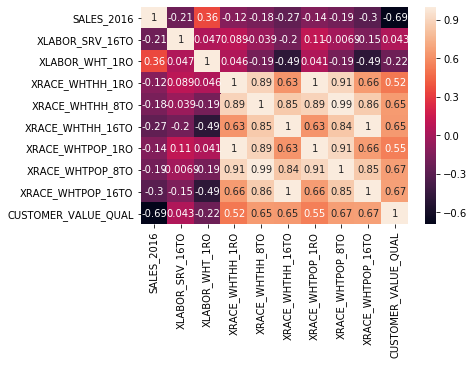

In [55]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,XLABOR_SRV_16TO 
,XLABOR_WHT_1RO 
,XRACE_WHTHH_1RO 
,XRACE_WHTHH_8TO 
,XRACE_WHTHH_16TO 
,XRACE_WHTPOP_1RO 
,XRACE_WHTPOP_8TO 
,XRACE_WHTPOP_16TO
,CUSTOMER_VALUE_QUAL 
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

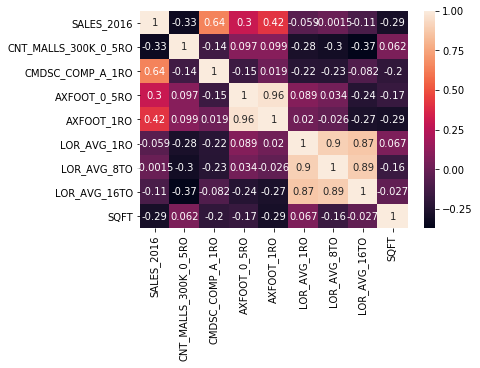

In [56]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################


# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,CNT_MALLS_300K_0_5RO 
,CMDSC_COMP_A_1RO 
,AXFOOT_0_5RO 
,AXFOOT_1RO
,LOR_AVG_1RO
,LOR_AVG_8TO 
,LOR_AVG_16TO 
,SQFT
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

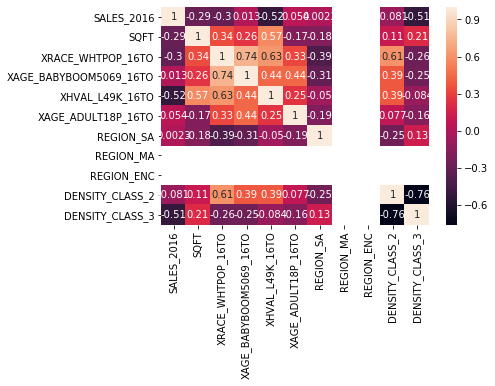

In [57]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################

# FINAL VARIABLES

# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,SQFT
,XRACE_WHTPOP_16TO
,XAGE_BABYBOOM5069_16TO
,XHVAL_L49K_16TO
,XAGE_ADULT18P_16TO
,REGION_SA
,REGION_MA
,REGION_ENC
,DENSITY_CLASS_2
,DENSITY_CLASS_3
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

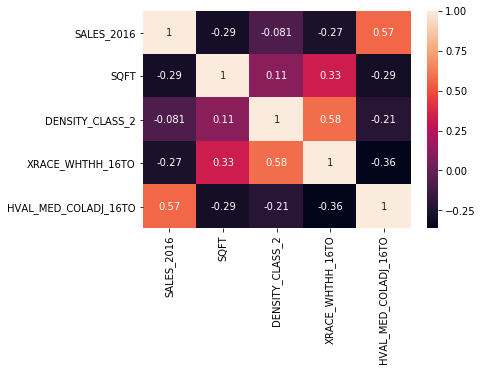

In [58]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################

# LARGE FINAL VARIABLES

# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,SQFT
,DENSITY_CLASS_2
,XRACE_WHTHH_16TO
,HVAL_MED_COLADJ_16TO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)

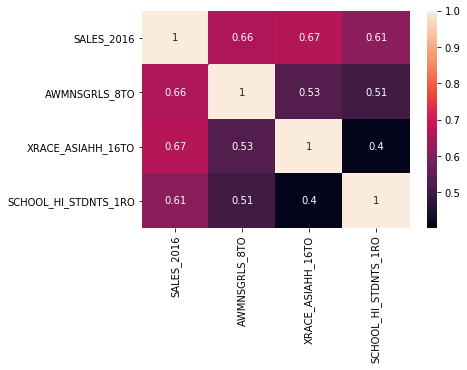

In [59]:
#############################################################################################################################
### Highest correlated variables
#############################################################################################################################

# SMALL FINAL VARIABLES

# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT SALES_2016
,AWMNSGRLS_8TO
,XRACE_ASIAHH_16TO
,SCHOOL_HI_STDNTS_1RO
FROM dfBuxtonData;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()

sns.heatmap(corrMatrix, annot=True)